In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

d:\Users\Public\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('d:diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.shape

(768, 9)

In [8]:
df.duplicated().sum()

0

In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
x = df.iloc[:,:-1]
y = df['Outcome']

In [12]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train , x_test ,y_train , y_test = train_test_split(x, y ,random_state=42 , test_size = 0.2)

In [15]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [16]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler

# x--scaled = (x-mean) / sd

In [18]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [19]:
x_train_scaled

array([[-0.52639686, -1.15139792, -3.75268255, ..., -4.13525578,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485, ..., -0.48916881,
         2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , ..., -0.42452187,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.62029661,  0.89659009, ...,  1.76054443,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.62935353, -3.75268255, ...,  1.34680407,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.12949347,  1.43720319, ..., -1.22614383,
        -0.61552223, -1.03594038]])

In [20]:
tf.random.set_seed(42)

In [21]:
x_train_scaled.shape[1]

8

In [22]:
from tensorflow import keras

In [23]:
from keras.layers import Input , Dense

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
model = Sequential()

In [26]:
model.add(Input(shape=(x_train_scaled.shape[1],)))

In [27]:
model.add(Dense(units=128 , activation = 'relu'))
model.add(Dense(units=64 , activation='relu'))
model.add(Dense(units = 32 , activation='relu'))
model.add(Dense(units=1 , activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11521 (45.00 KB)
Trainable params: 11521 (45.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(loss='binary_crossentropy' , optimizer = tf.keras.optimizers.Adam() , metrics=['accuracy'])

In [30]:
result = model.fit(x_train_scaled , y_train , validation_data = (x_test_scaled , y_test) , epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 18ms/step - loss: 0.6308 - accuracy: 0.6775 - val_loss: 0.5631 - val_accuracy: 0.7273
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5072 - accuracy: 0.7638 - val_loss: 0.4953 - val_accuracy: 0.7922
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4527 - accuracy: 0.7834 - val_loss: 0.4964 - val_accuracy: 0.7792
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4421 - accuracy: 0.7850 - val_loss: 0.4944 - val_accuracy: 0.7857
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4356 - accuracy: 0.7915 - val_loss: 0.5066 - val_accuracy: 0.7792
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4271 - accuracy: 0.7980 - val_loss: 0.5119 - val_accuracy: 0.7662
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4187 - accuracy: 0.7964 - val_loss: 0.5181 - val_accuracy: 0.7727
Epoch 8/100


In [31]:
y_train_pred = model.predict(x_train_scaled )
y_test_pred = model.predict(x_test_scaled)

5/5 [==============================] - 0s 2ms/step


In [32]:
y_train_pred[0] >=0.5


array([False])

In [33]:
from sklearn.metrics import confusion_matrix , accuracy_score

confusion_matrix(y_pred = y_train_pred >=0.5 , y_true= y_train)

array([[401,   0],
       [  3, 210]], dtype=int64)

In [34]:
accuracy_score(y_pred = y_train_pred >=0.5 , y_true= y_train)

0.995114006514658

In [35]:
accuracy_score(y_pred = y_test_pred >=0.5 , y_true= y_test)

0.7142857142857143

In [36]:
history = pd.DataFrame(result.history)

In [37]:
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.630757,0.677524,0.563059,0.727273
1,0.507167,0.763844,0.495345,0.792208
2,0.452689,0.783388,0.496395,0.779221
3,0.442127,0.785016,0.494392,0.785714
4,0.435600,0.791531,0.506616,0.779221


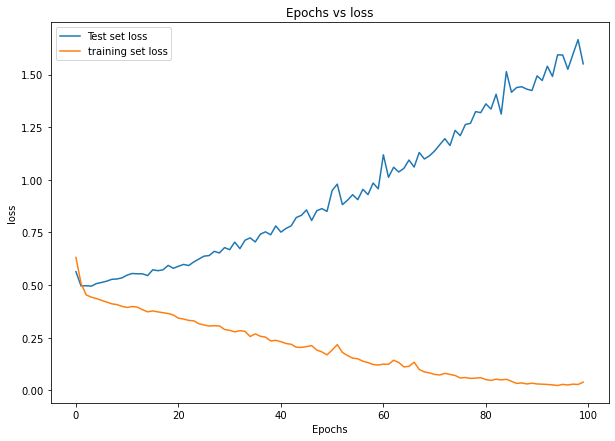

In [38]:
plt.figure(figsize=(10,7))
plt.plot(history.val_loss , label='Test set loss')
plt.plot(history.loss , label='training set loss')
plt.title('Epochs vs loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

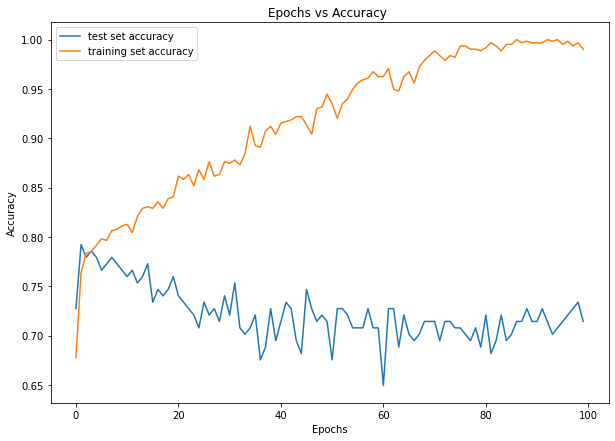

In [39]:
plt.figure(figsize=(10,7))
plt.plot(history.val_accuracy , label='test set accuracy')
plt.plot(history.accuracy , label='training set accuracy')
plt.title('Epochs vs Accuracy ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Implement Early Stopping

In [40]:
from tensorflow.keras.callbacks import EarlyStopping
model2 = Sequential()
model2.add(Input(shape=(x_train_scaled.shape[1],)))
model2.add(Dense(units=128 , activation='relu'))
model2.add(Dense(units=64,activation='relu'))
model2.add(Dense(units=32 , activation='relu'))
model2.add(Dense(units=1 , activation='sigmoid'))

In [41]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1152      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11521 (45.00 KB)
Trainable params: 11521 (45.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model2.compile(loss='binary_crossentropy' , optimizer = tf.keras.optimizers.Adam() , metrics=['accuracy'])

In [43]:
es = EarlyStopping(monitor ='val_score' , patience=4)

In [45]:
result_es = model2.fit(x_train_scaled,y_train , validation_data=(x_test_scaled , y_test) , callbacks=[es],epochs=100)

Epoch 1/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0177 - accuracy: 0.9984 - val_loss: 1.8405 - val_accuracy: 0.6883
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0177 - accuracy: 0.9984 - val_loss: 1.8015 - val_accuracy: 0.6948
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 1.8573 - val_accuracy: 0.6883
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0427 - accuracy: 0.9951 - val_loss: 1.8839 - val_accuracy: 0.6883
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.9935 - val_loss: 1.8063 - val_accuracy: 0.6883
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.9967 - val_loss: 1.9443 - val_accuracy: 0.7013
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0452 - accuracy: 0.9886 - val_loss: 1.9116 - val_accuracy: 0.6753
Epoch 8/100
2

In [47]:
history_es = pd.DataFrame(result_es.history)

In [48]:
history_es

,loss,accuracy,val_loss,val_accuracy
0,0.017695,0.998371,1.840491,0.688312
1,0.017660,0.998371,1.801480,0.694805
2,0.014899,1.000000,1.857342,0.688312
3,0.042673,0.995114,1.883874,0.688312
4,0.025034,0.993485,1.806327,0.688312
...,...,...,...,...
95,0.002459,1.000000,2.672686,0.681818
96,0.002343,1.000000,2.677464,0.668831
97,0.002151,1.000000,2.660792,0.681818
98,0.002106,1.000000,2.675913,0.675325


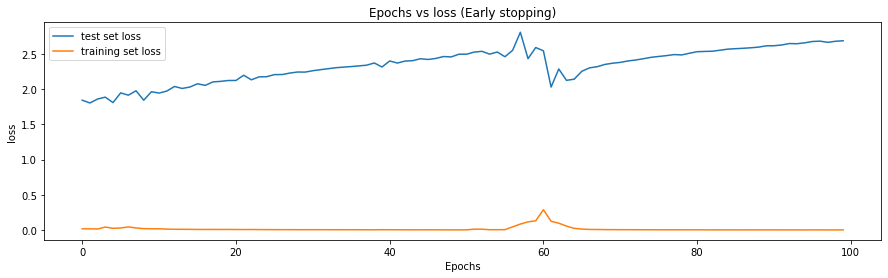

In [51]:
plt.figure(figsize=(15,4))
plt.plot(history_es.val_loss , label='test set loss')
plt.plot(history_es.loss , label='training set loss')
plt.title('Epochs vs loss (Early stopping)')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

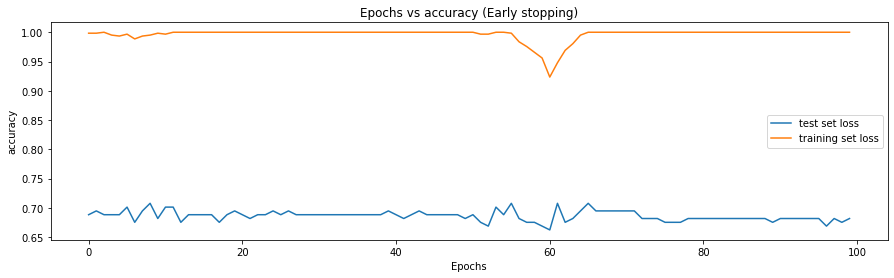

In [52]:
plt.figure(figsize=(15,4))
plt.plot(history_es.val_accuracy , label='test set loss')
plt.plot(history_es.accuracy , label='training set loss')
plt.title('Epochs vs accuracy (Early stopping)')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Implementing L1 Regularization

In [54]:
tf.random.set_seed(42)
model3 = Sequential()
model3.add(Input(shape=(x_train_scaled.shape[1],)))
model3.add(Dense(units=128 , activation='relu' , kernel_regularizer = tf.keras.regularizers.L1()))
model3.add(Dense(units=64, activation='relu'))
model3.add(Dense(units=32 , activation='relu'))
model3.add(Dense(units=1 , activation='sigmoid'))

In [55]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11521 (45.00 KB)
Trainable params: 11521 (45.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
model3.compile(loss='binary_crossentropy' , optimizer = tf.keras.optimizers.Adam() , metrics=['accuracy'])

In [57]:
result2 = model3.fit(x_train_scaled , y_train , validation_data=(x_test_scaled , y_test) , epochs=100)

Epoch 1/100
20/20 [==============================] - 2s 12ms/step - loss: 1.6425 - accuracy: 0.6547 - val_loss: 1.4926 - val_accuracy: 0.7532
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 1.3837 - accuracy: 0.7622 - val_loss: 1.2735 - val_accuracy: 0.8052
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 1.1764 - accuracy: 0.7638 - val_loss: 1.1097 - val_accuracy: 0.7922
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 1.0264 - accuracy: 0.7720 - val_loss: 0.9938 - val_accuracy: 0.7857
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9120 - accuracy: 0.7899 - val_loss: 0.9008 - val_accuracy: 0.7792
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.8181 - accuracy: 0.7850 - val_loss: 0.8264 - val_accuracy: 0.7727
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.7401 - accuracy: 0.7801 - val_loss: 0.7678 - val_accuracy: 0.7727
Epoch 8/100


In [58]:
history = pd.DataFrame(result2.history)

In [59]:
history.head()

,loss,accuracy,val_loss,val_accuracy
0,1.642472,0.654723,1.492557,0.753247
1,1.383701,0.762215,1.273530,0.805195
2,1.176362,0.763844,1.109705,0.792208
3,1.026381,0.771987,0.993806,0.785714
4,0.912035,0.789902,0.900837,0.779221


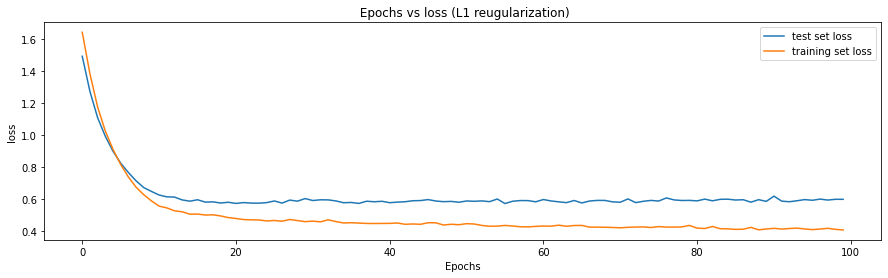

In [61]:
plt.figure(figsize=(15,4))
plt.plot(history.val_loss , label='test set loss')
plt.plot(history.loss , label='training set loss')
plt.title(' Epochs vs loss (L1 reugularization)')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Implement Dropout Regularization

In [64]:
from tensorflow.keras.layers import Dropout

In [65]:
tf.random.set_seed(42)
model4 = Sequential()
model4.add(Input(shape=(x_train_scaled.shape[1] , )))
model4.add(Dense(units=128 , activation='relu'))
model4.add(Dropout(0.4))


model4.add(Dense(units=64 , activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(units=32, activation='relu'))
model4.add(Dropout(0.25))

model4.add(Dense(units=1 ,  activation='sigmoid'))

model4.add

<bound method Sequential.add of <keras.src.engine.sequential.Sequential object at 0x000002136DA11430>>

In [66]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 128)               1152      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 1)                

In [67]:
model4.compile(loss='binary_crossentropy' , optimizer=tf.keras.optimizers.Adam() , metrics=['accuracy'])

In [69]:
result5 = model4.fit(x_train_scaled , y_train , validation_data=(x_test_scaled, y_test) , epochs=100)

Epoch 1/100
20/20 [==============================] - 3s 41ms/step - loss: 0.6823 - accuracy: 0.5717 - val_loss: 0.6137 - val_accuracy: 0.7273
Epoch 2/100
20/20 [==============================] - 0s 9ms/step - loss: 0.5960 - accuracy: 0.7215 - val_loss: 0.5654 - val_accuracy: 0.7532
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.5488 - accuracy: 0.7199 - val_loss: 0.5235 - val_accuracy: 0.7662
Epoch 4/100
20/20 [==============================] - 0s 10ms/step - loss: 0.5379 - accuracy: 0.7524 - val_loss: 0.5073 - val_accuracy: 0.7792
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 0.5170 - accuracy: 0.7508 - val_loss: 0.5050 - val_accuracy: 0.7792
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.4699 - accuracy: 0.7752 - val_loss: 0.5110 - val_accuracy: 0.7597
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.4905 - accuracy: 0.7638 - val_loss: 0.5166 - val_accuracy: 0.7662
Epoch 8

In [73]:
history2 = pd.DataFrame(result5.history)

In [74]:
history2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.682292,0.571661,0.613692,0.727273
1,0.596028,0.721498,0.565443,0.753247
2,0.548825,0.719870,0.523473,0.766234
3,0.537936,0.752443,0.507293,0.779221
4,0.517006,0.750814,0.504951,0.779221


[]

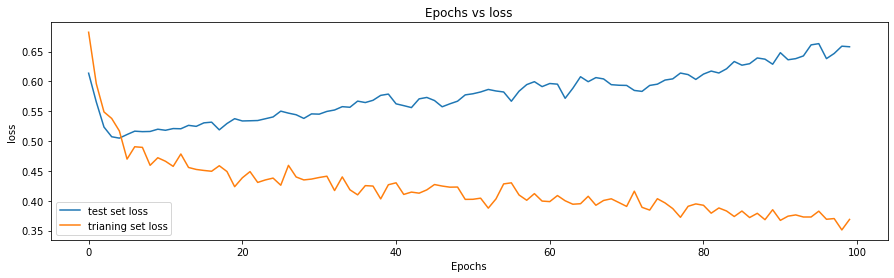

In [75]:
plt.figure(figsize=(15,4))
plt.plot(history2.val_loss , label='test set loss')
plt.plot(history2.loss , label='trianing set loss')
plt.title('Epochs vs loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.plot()

[]

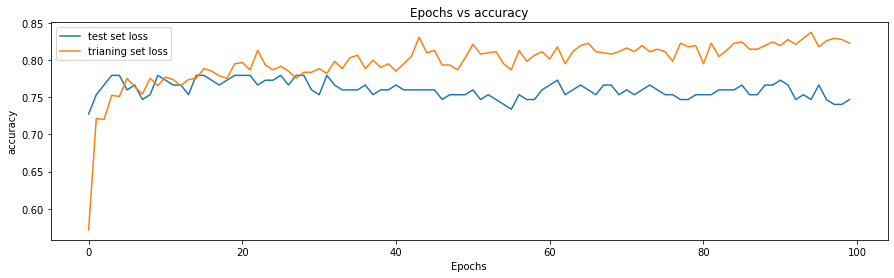

In [76]:
plt.figure(figsize=(15,4))
plt.plot(history2.val_accuracy , label='test set loss')
plt.plot(history2.accuracy , label='trianing set loss')
plt.title('Epochs vs accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.plot()